<a href="https://www.kaggle.com/code/abdulrehmanchatha/sales-forecasting-using-time-series-analysis?scriptVersionId=244164909" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Mock Data
Synthetic sales dataset for 36 months using Poisson distribution.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Generate dataset
date_range = pd.date_range(start='2020-01-01', periods=36, freq='M')
sales = np.random.poisson(lam=200, size=36) + np.linspace(0, 100, 36)
df = pd.DataFrame({'Date': date_range, 'Sales': sales.round(2)})

# Show first rows
df.head()


,Date,Sales
0,2020-01-31,208.00
1,2020-02-29,205.86
2,2020-03-31,188.71
3,2020-04-30,195.57
4,2020-05-31,221.43


# 2. Show Informetion of data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    36 non-null     datetime64[ns]
 1   Sales   36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 708.0 bytes


# 3. Sales Trend Basic Data Visualizatio 
Line plot showing sales variations over time.

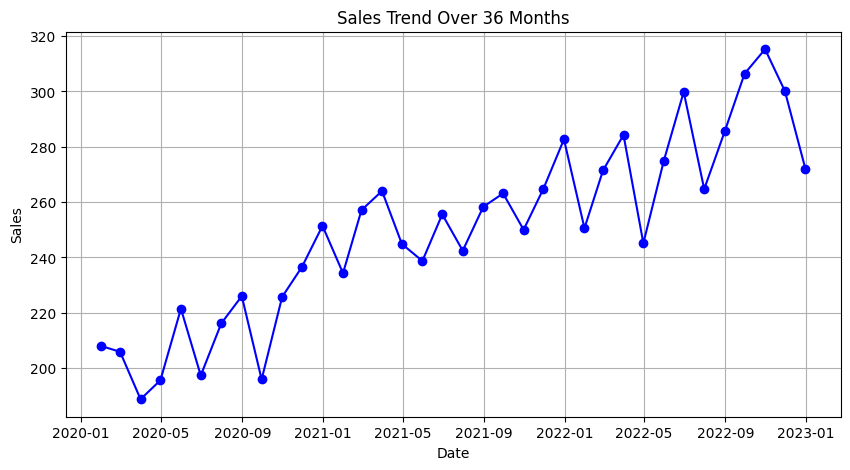

In [4]:
import matplotlib.pyplot as plt  

# Plot sales trend
plt.figure(figsize=(10,5))
plt.plot(df["Date"], df["Sales"], marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trend Over 36 Months")
plt.grid()
plt.show()


# 4. Time Series Decomposition  
Breaking sales data into **trend**, **seasonality**, and **residuals**.


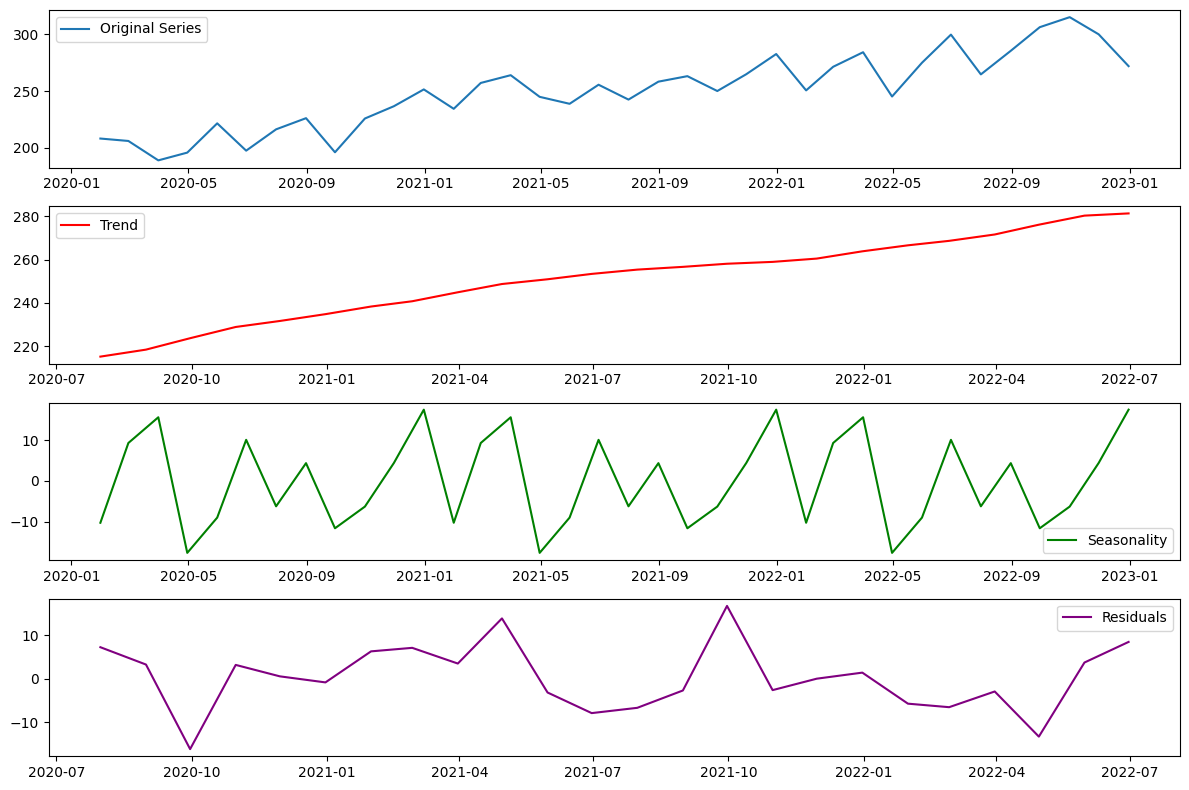

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose  

# Decompose time series
decomposition = seasonal_decompose(df["Sales"], model="additive", period=12)  

# Plot components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df["Date"], df["Sales"], label="Original Series")
plt.legend()

plt.subplot(412)
plt.plot(df["Date"], decomposition.trend, label="Trend", color="r")
plt.legend()

plt.subplot(413)
plt.plot(df["Date"], decomposition.seasonal, label="Seasonality", color="g")
plt.legend()

plt.subplot(414)
plt.plot(df["Date"], decomposition.resid, label="Residuals", color="purple")
plt.legend()

plt.tight_layout()
plt.show()


# 5. ARIMA Forecast  
Using ARIMA to predict next 12 months' sales.


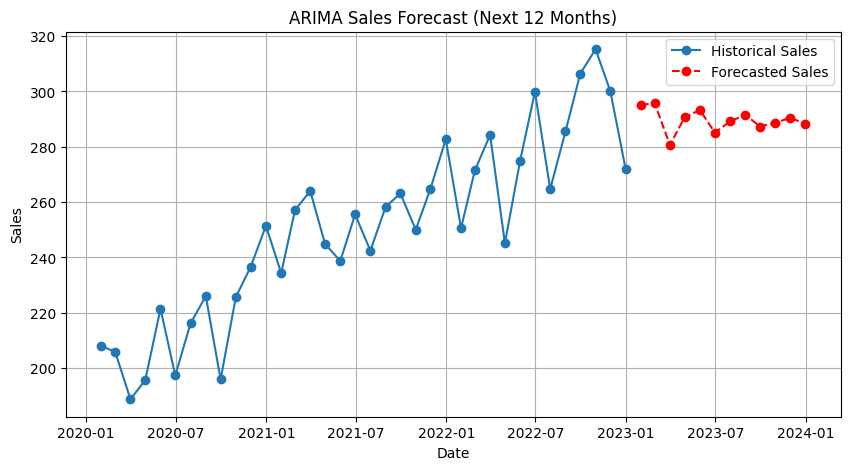

In [6]:
from statsmodels.tsa.arima.model import ARIMA  

# Fit ARIMA model
model = ARIMA(df["Sales"], order=(2, 1, 2))  
arima_result = model.fit()

# Forecast next 12 months
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

# Generate future dates
future_dates = pd.date_range(start=df["Date"].iloc[-1] + pd.DateOffset(1), periods=forecast_steps, freq='M')

# Create forecast DataFrame
forecast_df = pd.DataFrame({"Date": future_dates, "Forecasted Sales": forecast.round(2)})

# Plot forecast
plt.figure(figsize=(10,5))
plt.plot(df["Date"], df["Sales"], label="Historical Sales", marker="o")
plt.plot(future_dates, forecast, label="Forecasted Sales", marker="o", linestyle="dashed", color="r")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("ARIMA Sales Forecast (Next 12 Months)")
plt.legend()
plt.grid()
plt.show()


# 6. Forecast Evaluation  
Calculating MAE & RMSE for forecast accuracy.

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error  

# Calculate evaluation metrics
mae = mean_absolute_error(df["Sales"].iloc[-forecast_steps:], forecast)
rmse = mean_squared_error(df["Sales"].iloc[-forecast_steps:], forecast, squared=False)

# Display results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 21.11
Root Mean Squared Error (RMSE): 24.64


# 7. Actual vs Forecast  
Comparing real and predicted sales trends.


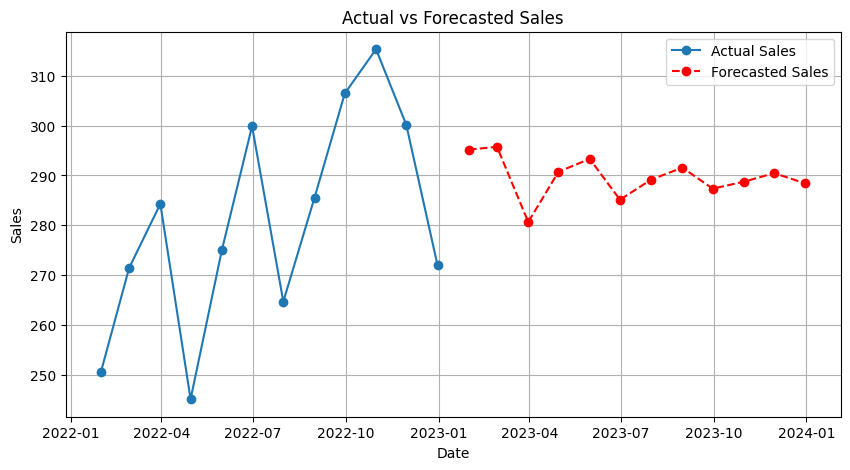

In [8]:
# Combine historical and forecast data
combined_df = pd.concat([df.tail(forecast_steps), forecast_df])

# Plot comparison
plt.figure(figsize=(10,5))
plt.plot(combined_df["Date"], combined_df["Sales"], marker="o", label="Actual Sales", linestyle="-")
plt.plot(combined_df["Date"], combined_df["Forecasted Sales"], marker="o", label="Forecasted Sales", linestyle="dashed", color="r")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Actual vs Forecasted Sales")
plt.legend()
plt.grid()
plt.show()


# 8. Project Complete  
Finalized forecasting, evaluated results, and saved predictions.

In [9]:
# Save forecast data to CSV for future reference
forecast_df.to_csv("sales_forecast.csv", index=False)

# Display completion message
print("Forecast results saved as 'sales_forecast.csv'")


Forecast results saved as 'sales_forecast.csv'
